<a href="https://colab.research.google.com/github/mostafa-ja/Let-s-build-an-LLM/blob/main/Let's_build_the_GPT_Tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code background

## `torch.stack` vs `torch.cat`
Both `torch.stack` and `torch.cat` are used to combine tensors in PyTorch, but they behave differently:

### **1. `torch.stack`**
- Combines tensors along a **new** dimension.
- The tensors must have the same shape.
- The resulting tensor has one additional dimension.

#### **Example:**
```python
import torch

a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

stacked = torch.stack([a, b], dim=0)
print(stacked)
print(stacked.shape)  # torch.Size([2, 3])
```
**Output:**
```
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])  # New dimension is added
```

---
#### **2. `torch.cat`**
- Concatenates tensors along an **existing** dimension.
- The tensors must have matching shapes **except in the concatenation dimension**.

#### **Example:**
```python
concatenated = torch.cat([a, b], dim=0)
print(concatenated)
print(concatenated.shape)  # torch.Size([6])
```
**Output:**
```
tensor([1, 2, 3, 4, 5, 6])
torch.Size([6])  # No new dimension added
```

### **3. `Equivalant of stack`**

#### **Example:**
```python
concatenated = torch.cat([a.unsqueeze(0), b.unsqueeze(0)], dim=0)
print(concatenated)
print(concatenated.shape)
```
**Output:**
```
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
```



---
### **Key Differences**
| Feature       | `torch.stack`          | `torch.cat`            |
|--------------|----------------------|----------------------|
| **Effect**   | Adds a new dimension  | Joins along existing dimension |
| **Shapes**   | Must be identical     | Must match in all but concat dimension |
| **Resulting Shape** | Has one extra dimension | Keeps same number of dimensions |
| **Example Shape Change** | `(3,) → (2, 3)` | `(3,) + (3,) → (6,)` |

---

- Use **`torch.stack`** when you want to group tensors together and need an additional dimension (e.g., batching).


## **Understanding UTF-8, UTF-16, and UTF-32**  
UTF-8, UTF-16, and UTF-32 are character encoding schemes used to represent Unicode text in computers. They differ in how they store characters in memory.

---

### **1. UTF-8 (8-bit Unicode Transformation Format)**
🔹 **Encoding:** Uses **1 to 4 bytes** per character.  
🔹 **How it works:**  
   - ASCII characters (0-127) use **1 byte** (same as ASCII).  
   - Other characters use **2, 3, or 4 bytes** based on their Unicode value.  
   - Variable-length encoding.  

✅ **Advantages:**  
- **Memory-efficient for English text** (since ASCII stays 1 byte).  
- **Backward-compatible with ASCII.**  
- **Widely used on the web, Linux, and programming languages.**  
- **Handles any Unicode character efficiently.**  

❌ **Disadvantages:**  
- **Slower processing** compared to fixed-length encodings (like UTF-32).  
- **Variable length makes indexing difficult** (e.g., finding the 10th character requires scanning).  

---

### **2. UTF-16 (16-bit Unicode Transformation Format)**
🔹 **Encoding:** Uses **2 or 4 bytes** per character.  
🔹 **How it works:**  
   - Most common characters (Basic Multilingual Plane, BMP) use **2 bytes**.  
   - Rare characters (Supplementary Plane) use **4 bytes** (a pair of 2-byte values).  

✅ **Advantages:**  
- **More efficient for Asian languages** (Chinese, Japanese, Korean) since most characters fit in 2 bytes.  
- **Faster processing than UTF-8** for certain texts with lots of non-ASCII characters.  

❌ **Disadvantages:**  
- **Uses more memory** than UTF-8 for English text (ASCII needs 2 bytes instead of 1).  
- **Not ASCII-compatible** (can cause issues in systems designed for UTF-8).  
- **Variable length (2 or 4 bytes) makes indexing tricky.**  

---

### **3. UTF-32 (32-bit Unicode Transformation Format)**
🔹 **Encoding:** Uses **4 bytes per character** (fixed-length).  
🔹 **How it works:**  
   - Every character takes exactly **4 bytes**, no matter how common or rare.  

✅ **Advantages:**  
- **Fastest for processing & indexing** (constant time lookup, since all characters are the same size).  
- **Simplest encoding method** (each character = 1 unit, no need for extra logic).  

❌ **Disadvantages:**  
- **Wastes a lot of memory** (ASCII characters that need 1 byte in UTF-8 now take 4 bytes!).  
- **Inefficient for real-world text** (most text doesn’t need 4 bytes per character).  
- **Rarely used in practical applications** (except in some specialized cases).  

---

### **Comparison Table**  

| Encoding | Bytes per Character | Best For | Pros | Cons |
|----------|--------------------|---------|------|------|
| **UTF-8**  | 1–4 | English, Web | Compact, ASCII-compatible | Slower indexing |
| **UTF-16** | 2–4 | Asian scripts | Efficient for CJK text | Not ASCII-friendly |
| **UTF-32** | 4 | Fixed-width needs | Fast lookup | Wastes memory |

#### **Which One Should You Use?**  
- **Use UTF-8**: Best for most applications (web, databases, programming).  
- **Use UTF-16**: If dealing with lots of Asian characters (but UTF-8 is replacing it).  
- **Use UTF-32**: Only if you **need constant-time character access** (rare).  

Would you like examples of how each encoding represents a specific character? 🚀

## The `map()` function
The `map()` function in Python is a powerful built-in function that allows you to apply a given function to each item in an iterable (like a list, tuple, or string) and returns an iterator that yields the results.

**Basic Syntax:**

```python
map(function, iterable, ...)
```

* **`function`**: The function to apply to each item.
* **`iterable`**: The iterable (list, tuple, etc.) whose items will be processed.
* **`...` (Optional):** You can provide multiple iterables if your function takes multiple arguments. `map()` will then apply the function to corresponding items from each iterable.

**How it Works:**

1.  `map()` takes a function and an iterable as input.
2.  It applies the function to each element of the iterable.
3.  It returns an iterator that yields the results of these function calls.
4.  To get the results as a list or tuple, you need to explicitly convert the iterator.

**Examples:**

**1. Squaring Numbers in a List:**

```python
def square(x):
    return x * x

numbers = [1, 2, 3, 4, 5]
squared_numbers = list(map(square, numbers))
print(squared_numbers)  # Output: [1, 4, 9, 16, 25]
```

**2. Using a Lambda Function:**

Lambda functions are often used with `map()` for concise operations.

```python
numbers = [1, 2, 3, 4, 5]
squared_numbers = list(map(lambda x: x * x, numbers))
print(squared_numbers)  # Output: [1, 4, 9, 16, 25]
```

**3. Converting Strings to Uppercase:**

```python
words = ["hello", "world", "python"]
uppercase_words = list(map(str.upper, words))
print(uppercase_words)  # Output: ['HELLO', 'WORLD', 'PYTHON']
```

**4. Using Multiple Iterables:**

```python
numbers1 = [1, 2, 3]
numbers2 = [4, 5, 6]

sums = list(map(lambda x, y: x + y, numbers1, numbers2))
print(sums)  # Output: [5, 7, 9]
```

**5. Converting strings to integers:**

```python
stringNumbers = ["1", "2", "3", "4"]
intNumbers = list(map(int, stringNumbers))
print(intNumbers) #Output: [1, 2, 3, 4]
```

We are going to build the model based on karpathy's tutorial video [1 ](https://www.youtube.com/watch?v=zduSFxRajkE) and [2 ](https://www.youtube.com/watch?v=kCc8FmEb1nY)


Good tokenization web app: [https://tiktokenizer.vercel.app](https://tiktokenizer.vercel.app)

More explanation also [here ](https://medium.com/@govindarajpriyanthan/build-and-train-gpt-4-tokenizer-from-scratch-ad90d3af0f11)






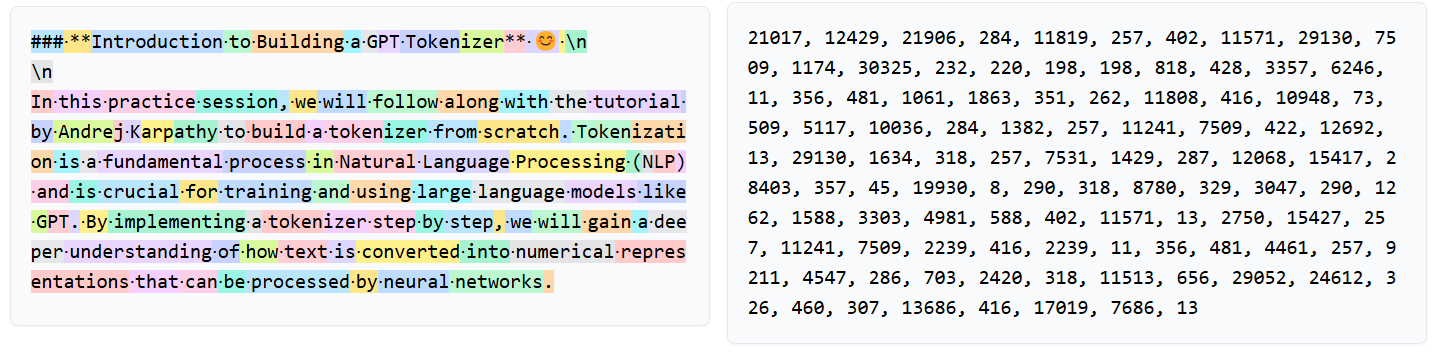


# **Introduction to Building a GPT Tokenizer** 😊

In this practice session, we will follow along with the tutorial by Andrej Karpathy to build a tokenizer from scratch. Tokenization is a fundamental process in Natural Language Processing (NLP) and is crucial for training and using large language models like GPT. By implementing a tokenizer step by step, we will gain a deeper understanding of how text is converted into numerical representations that can be processed by neural networks.  

Our goal is to build a simple but effective tokenizer using Byte Pair Encoding (BPE), which is a widely used subword tokenization technique. This method balances vocabulary size and model performance by iteratively merging the most frequent character pairs into new tokens.  

## **What We Will Learn**  
1. **Understanding Tokenization** – Why tokenization is necessary and how it affects NLP models.  
2. **Byte Pair Encoding (BPE) Basics** – The core idea behind BPE and why it is effective for NLP tasks.  
3. **Implementing BPE Step by Step** – Following Karpathy’s tutorial to implement BPE in Python.  
4. **Encoding and Decoding** – How to encode text into token sequences and decode them back.  
5. **Practical Considerations** – Optimizing tokenization for different applications and languages.  

By the end of this practice, you will have a working tokenizer and a solid understanding of its inner workings, preparing you for more advanced NLP tasks. Let’s dive in!  


## **Why Do We Need Tokenization?**  

Tokenization is essential in NLP because models process numbers, not raw text. It converts text into smaller units (tokens) that can be efficiently handled by machine learning algorithms.  

#### **Different Tokenization Methods:**  
1. **Word-Based Tokenization** – Splits text into words (e.g., "I’m happy" → ["I’m", "happy"]).  
   - ❌ **Issue:** Leads to a large vocabulary and struggles with unseen words (OOV problem).  
2. **Character-Based Tokenization** – Treats each character as a token (e.g., "hello" → ["h", "e", "l", "l", "o"]).  
   - ❌ **Issue:** Requires longer sequences, making learning context difficult.  
3. **Subword Tokenization (e.g., BPE, WordPiece, Unigram)** – Breaks words into frequent subunits (e.g., "happiness" → ["happi", "ness"]).  
   - ✅ **Advantage:** Balances vocabulary size, handles rare words well, and retains word structure.  



####**Tokenization Strategies in Modern Language Models:**

* **GPT (Generative Pre-trained Transformer) Family (OpenAI):**
    * Primarily employs **Byte Pair Encoding (BPE)**. BPE iteratively merges the most frequent byte or character pairs in the training data, creating a vocabulary of subword units. This allows GPT models to efficiently handle both common and rare words, including those not seen during training.
* **BERT (Bidirectional Encoder Representations from Transformers) (Google):**
    * Utilizes **WordPiece tokenization**, a subword tokenization algorithm similar to BPE. WordPiece optimizes for data likelihood, merging subword units that maximize the probability of the training data. This helps BERT models to effectively represent and process diverse text.
* **Contemporary Large Language Models (LLMs) (GPT-4, Gemini, Claude, etc.):**
    * These advanced models often leverage refined versions of **BPE** or **Unigram Language Model** based tokenization. These modern approaches are designed to:
        * **Enhance Vocabulary Coverage:** Better handling of diverse languages and specialized domains.
        * **Improve Computational Efficiency:** Reducing the length of token sequences and optimizing processing.
        * **Minimize Out-of-Vocabulary (OOV) Issues:** Effectively representing rare or unseen words.
        * **SentencePiece:** Some of these modern LLMs, especially those designed to be multilingual, utilize SentencePiece. SentencePiece allows for language agnostic training, and can use either BPE or unigram algorithms.


#### **What is Unigram Tokenization?**  

A Unigram Language Model is a simple statistical model that calculates the probability of a word based on its frequency in training data, assuming words are independent of each other. In tokenization, it helps determine the most probable way to break text into tokens.

# Import data

In [101]:
# Let's download the tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-03-22 18:16:33--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2025-03-22 18:16:33 (18.2 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [2]:
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [4]:
# let's look at the first 200 characters
print(text[:200])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you


# Tokenization(character level)

In [10]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [22]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [26]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch
data = torch.tensor(encode(text), dtype=torch.long)  # torch.long is an alias for torch.int64
print(data.shape, data.dtype)
print(data[:100]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59])


In [27]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [33]:
block_size = 8
print(train_data[:block_size+1])

x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])
when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [39]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])


In [40]:
for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53, 56, 1, 58, 46] the target: 39
when input is [44, 53, 56, 1, 58, 46, 39] the target: 58
when input is [44, 53, 56, 1, 58, 46, 39, 58] the target: 1
when input is [52] the target: 58
when input is [52, 58] the target: 1
when input is [52, 58, 1] the target: 58
when input is [52, 58, 1, 58] the target: 46
when input is [52, 58, 1, 58, 46] the target: 39
when input is [52, 58, 1, 58, 46, 39] the t

In [41]:
import torch

a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

stacked = torch.stack([a, b], dim=0)
print(stacked)
print(stacked.shape)  # torch.Size([2, 3])

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [43]:
import torch

a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

stacked = torch.cat([a, b], dim=0)
print(stacked)
print(stacked.shape)  # torch.Size([2, 3])

stacked = torch.cat([a.unsqueeze(0), b.unsqueeze(0)], dim=0)
print(stacked)
print(stacked.shape)  # torch.Size([2, 3])

tensor([1, 2, 3, 4, 5, 6])
torch.Size([6])
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


# Byte Pair Encoding (BPE)

## Unicode

In [6]:
# list("👋".encode("utf-8")) gives you the byte-level representation of the emoji in UTF-8 encoding.
# ord("👋") gives you the character-level Unicode code point of the emoji.

utf8_bytes = list("👋".encode("utf-8")) # without list() shows byte object by b'....', shows ASCII range itself , others with different character
unicode_codepoint = ord("👋")

print(utf8_bytes)
print(unicode_codepoint)


[240, 159, 145, 139]
128075



* **Unicode Code Point (ord()):**
    * The `ord("👋")` output, `128075`, is the abstract numerical representation of the "waving hand" emoji within the Unicode standard. This number uniquely identifies that specific character.
* **UTF-8 Byte Sequence (encode()):**
    * The `list("👋".encode("utf-8"))` output, `[240, 159, 148, 132]`, is the way that Unicode code point is *encoded* into a sequence of bytes for storage or transmission.
    * UTF-8 is a variable-length encoding. This means that code points outside the basic ASCII range (like emojis) require multiple bytes to represent them.
    * UTF-8 defines a specific algorithm to transform the Unicode code point 128075 into the four bytes 240, 159, 148, and 132.



In [7]:
# "a" is in the basic ASCII range
print(ord("a"))
print(list("a".encode("utf-8")))

97
[97]


In [19]:
# consider the length of encodes, we see utf-16 and utf-32 are no effecient for ASCII range(english part)
utf_8 = "hello in Korean".encode("utf-8")
utf_16 = "hello in Korean".encode("utf-16")
utf_32 = "hello in Korean".encode("utf-32")

print('utf-8 : ', utf_8)
print('utf-8 : ', list(utf_8))
print('utf-16 : ', utf_16)
print('utf-16 : ', list(utf_16))
print('utf-32 : ', utf_32)
print('utf-32 : ', list(utf_32))

utf-8 :  b'hello in Korean'
utf-8 :  [104, 101, 108, 108, 111, 32, 105, 110, 32, 75, 111, 114, 101, 97, 110]
utf-16 :  b'\xff\xfeh\x00e\x00l\x00l\x00o\x00 \x00i\x00n\x00 \x00K\x00o\x00r\x00e\x00a\x00n\x00'
utf-16 :  [255, 254, 104, 0, 101, 0, 108, 0, 108, 0, 111, 0, 32, 0, 105, 0, 110, 0, 32, 0, 75, 0, 111, 0, 114, 0, 101, 0, 97, 0, 110, 0]
utf-32 :  b'\xff\xfe\x00\x00h\x00\x00\x00e\x00\x00\x00l\x00\x00\x00l\x00\x00\x00o\x00\x00\x00 \x00\x00\x00i\x00\x00\x00n\x00\x00\x00 \x00\x00\x00K\x00\x00\x00o\x00\x00\x00r\x00\x00\x00e\x00\x00\x00a\x00\x00\x00n\x00\x00\x00'
utf-32 :  [255, 254, 0, 0, 104, 0, 0, 0, 101, 0, 0, 0, 108, 0, 0, 0, 108, 0, 0, 0, 111, 0, 0, 0, 32, 0, 0, 0, 105, 0, 0, 0, 110, 0, 0, 0, 32, 0, 0, 0, 75, 0, 0, 0, 111, 0, 0, 0, 114, 0, 0, 0, 101, 0, 0, 0, 97, 0, 0, 0, 110, 0, 0, 0]


In [22]:
# consider the length of encodes, we see utf-16 better on non ASCII range(non english part)
utf_8 = "안녕하세요 👋".encode("utf-8")
utf_16 = "안녕하세요 👋".encode("utf-16")
utf_32 = "안녕하세요 👋".encode("utf-32")

print('utf-8 : ', utf_8)
print('utf-8 : ', list(utf_8))
print('utf-16 : ', utf_16)
print('utf-16 : ', list(utf_16))
print('utf-32 : ', utf_32)
print('utf-32 : ', list(utf_32))

utf-8 :  b'\xec\x95\x88\xeb\x85\x95\xed\x95\x98\xec\x84\xb8\xec\x9a\x94 \xf0\x9f\x91\x8b'
utf-8 :  [236, 149, 136, 235, 133, 149, 237, 149, 152, 236, 132, 184, 236, 154, 148, 32, 240, 159, 145, 139]
utf-16 :  b'\xff\xfeH\xc5U\xb1X\xd58\xc1\x94\xc6 \x00=\xd8K\xdc'
utf-16 :  [255, 254, 72, 197, 85, 177, 88, 213, 56, 193, 148, 198, 32, 0, 61, 216, 75, 220]
utf-32 :  b'\xff\xfe\x00\x00H\xc5\x00\x00U\xb1\x00\x00X\xd5\x00\x008\xc1\x00\x00\x94\xc6\x00\x00 \x00\x00\x00K\xf4\x01\x00'
utf-32 :  [255, 254, 0, 0, 72, 197, 0, 0, 85, 177, 0, 0, 88, 213, 0, 0, 56, 193, 0, 0, 148, 198, 0, 0, 32, 0, 0, 0, 75, 244, 1, 0]



**Why using raw UTF-8 Unicode bytes directly as tokens in LLM tokenization is generally avoided:**

**1. Loss of Semantic Meaning:**

* **Individual Bytes Are Meaningless:** UTF-8 bytes, by themselves, rarely carry semantic meaning. LLMs thrive on tokens that represent meaningful units of language (words, subwords, etc.).
* **Contextual Dependence:** The meaning of a byte often depends on its context within a multi-byte sequence. For example, a byte in the middle of a UTF-8 character representation is meaningless without the surrounding bytes.
* **LLMs learn relationships between tokens:** Using bytes as tokens would force the LLM to learn relationships between completely meaningless tokens, making the learning process extremely inefficient.

**2. Increased Sequence Length:**

* **Multi-Byte Characters:** Many Unicode characters, especially those outside the basic ASCII range (including most characters in non-Latin scripts and emojis), require multiple UTF-8 bytes.
* **Long Sequences:** This would lead to significantly longer token sequences compared to subword tokenization. LLMs have limited context windows, and longer sequences reduce the amount of context the model can process.
* **Computational Cost:** Longer sequences also increase the computational cost of processing text.

**3. Inefficiency and Redundancy:**

* **Redundant Information:** Using individual bytes would force the LLM to process redundant information, as it would need to learn the relationships between bytes that make up a single character.
* **Inefficient Learning:** This would make the learning process less efficient and require more training data.

**4. Lack of Generalization:**

* **Limited Vocabulary:** While the vocabulary size would be relatively small (256 tokens), the model would struggle to generalize to unseen words or characters.
* **Subword Advantages:** Subword tokenization allows LLMs to break down unseen words into known subword units, improving generalization.

**5. Subword tokenization is superior:**

* Subword tokenization methods, like BPE or WordPiece, strike a balance between character-level and word-level representation.
* They create a vocabulary of frequently occurring character sequences, which allows LLMs to:
    * Handle rare or unknown words.
    * Reduce vocabulary size.
    * Capture semantic relationships.

In essence, using UTF-8 bytes as tokens would force LLMs to operate at a very low level, losing the semantic richness and efficiency provided by subword tokenization.


## BPE

Byte Pair Encoding (BPE) is a subword tokenization technique widely used in modern Large Language Models (LLMs). **BPE operates on UTF-8 encoded input to create subword tokens.** Here's a simplified explanation of its basics:

**Core Idea:**

* BPE aims to find a balance between character-level and word-level tokenization. It breaks down words into smaller, frequently occurring units (subwords).
* This helps LLMs handle rare or unknown words by decomposing them into recognizable parts.

**How it Works:**

1.  **Initialization:**
    * The process starts with a vocabulary that includes individual characters from the training data **which are UTF-8 bytes**.
2.  **Frequency Analysis:**
    * The algorithm scans the training text to identify the most frequent pair of adjacent symbols (characters or existing subwords).
3.  **Merging:**
    * The most frequent pair is merged into a new subword unit, which is then added to the vocabulary.
4.  **Iteration:**
    * Steps 2 and 3 are repeated until a desired vocabulary size is reached.
5.  **Tokenization:**
    * Once the vocabulary is built, the text is tokenized by breaking it down into the longest possible subwords from the vocabulary.

**Key Benefits:**

* **Handling Rare Words:** BPE can effectively represent words that are not in the training data by breaking them into known subwords.
* **Vocabulary Size Reduction:** It allows for a smaller vocabulary compared to word-level tokenization, which improves efficiency.
* **Language Flexibility:** BPE can handle various languages, as it operates on character sequences.

In essence, BPE is a data-driven approach that learns to create a vocabulary of subword units, enabling LLMs to process text more efficiently and robustly.


**Example: "banana bandana"**  
1. **Start with characters:**  
   `b a n a n a _ b a n d a n a`  

2. **Find the most frequent adjacent pair:**  
   - `a n` appears most → merge to `an`:  
     `b an a n a _ b an d a n a`  
   - Next, merge `an a` → `ana`:  
     `b ana n a _ b ana d a n a`  
   - Continue merging (`n a` → `na`, `b ana` → `bana`, `d ana` → `dana`):  
     `bana na _ bana dana`  

3. **Final tokens:** `bana, na, dana`  
   - `"banana"` = `bana + na`  
   - `"bandana"` = `bana + dana`  

This reduces vocabulary size and allows models to handle unseen words efficiently. 🚀

### start with simple text

In [23]:
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = "Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception."
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience
print('---')
print(text)
print("length:", len(text))
print('---')
print(tokens)
print("length:", len(tokens))

---
Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.
length: 533
---
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140

In [36]:
# first let's create a dictionary of the ferequncy of each pairs

def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]): # Pythonic way to iterate consecutive elements
        counts[pair] = counts.get(pair, 0) + 1
    return counts

stats = get_stats(tokens)

print(sorted(((v,k) for k,v in stats.items()), reverse=True))

[(20, (101, 32)), (15, (240, 159)), (12, (226, 128)), (12, (105, 110)), (10, (115, 32)), (10, (97, 110)), (10, (32, 97)), (9, (32, 116)), (8, (116, 104)), (7, (159, 135)), (7, (159, 133)), (7, (97, 114)), (6, (239, 189)), (6, (140, 240)), (6, (128, 140)), (6, (116, 32)), (6, (114, 32)), (6, (111, 114)), (6, (110, 103)), (6, (110, 100)), (6, (109, 101)), (6, (104, 101)), (6, (101, 114)), (6, (32, 105)), (5, (117, 115)), (5, (115, 116)), (5, (110, 32)), (5, (100, 101)), (5, (44, 32)), (5, (32, 115)), (4, (116, 105)), (4, (116, 101)), (4, (115, 44)), (4, (114, 105)), (4, (111, 117)), (4, (111, 100)), (4, (110, 116)), (4, (110, 105)), (4, (105, 99)), (4, (104, 97)), (4, (103, 32)), (4, (101, 97)), (4, (100, 32)), (4, (99, 111)), (4, (97, 109)), (4, (85, 110)), (4, (32, 119)), (4, (32, 111)), (4, (32, 102)), (4, (32, 85)), (3, (118, 101)), (3, (116, 115)), (3, (116, 114)), (3, (116, 111)), (3, (114, 116)), (3, (114, 115)), (3, (114, 101)), (3, (111, 102)), (3, (111, 32)), (3, (108, 108)), (

In [37]:
top_pair = max(stats, key=stats.get)
top_pair

(101, 32)

In [38]:
chr(101), chr(32)

('e', ' ')

In [48]:
# second, how to merge the most ferequent pair and create new tokens

def merge(ids, pair, idx):
  # in the list of ints (ids), replace all consecutive occurences of pair with the new token idx
  newids = []
  i = 0
  while i < len(ids):
    # if we are not at the very last position AND the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

print(merge([5, 6, 6, 7, 9, 1], (6, 7), 99))

tokens2 = merge(tokens, top_pair, 256)
print(tokens2)
print("length:", len(tokens2))

[5, 6, 99, 9, 1]
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140, 240, 159, 135, 169, 226, 128, 140, 240, 159, 135, 170, 33, 32, 240, 159, 152, 132, 32, 84, 104, 256, 118, 101, 114, 121, 32, 110, 97, 109, 256, 115, 116, 114, 105, 107, 101, 115, 32, 102, 101, 97, 114, 32, 97, 110, 100, 32, 97, 119, 256, 105, 110, 116, 111, 32, 116, 104, 256, 104, 101, 97, 114, 116, 115, 32, 111, 102, 32, 112, 114, 111, 103, 114, 97, 109, 109, 101, 114, 115, 32, 119, 111, 114, 108, 100, 119, 105, 100, 101, 46, 32, 87, 256, 97, 108, 108, 32, 107, 110, 111, 119, 32, 119, 256, 111, 117, 103, 104, 116, 32, 116, 111, 

In [90]:
# making the training text longer to have more representative token statistics
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = """A Programmer’s Introduction to Unicode March 3, 2017 · Coding · 22 Comments  Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺\u200c🇳\u200c🇮\u200c🇨\u200c🇴\u200c🇩\u200c🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.  A few months ago, I got interested in Unicode and decided to spend some time learning more about it in detail. In this article, I’ll give an introduction to it from a programmer’s point of view.  I’m going to focus on the character set and what’s involved in working with strings and files of Unicode text. However, in this article I’m not going to talk about fonts, text layout/shaping/rendering, or localization in detail—those are separate issues, beyond my scope (and knowledge) here.  Diversity and Inherent Complexity The Unicode Codespace Codespace Allocation Scripts Usage Frequency Encodings UTF-8 UTF-16 Combining Marks Canonical Equivalence Normalization Forms Grapheme Clusters And More… Diversity and Inherent Complexity As soon as you start to study Unicode, it becomes clear that it represents a large jump in complexity over character sets like ASCII that you may be more familiar with. It’s not just that Unicode contains a much larger number of characters, although that’s part of it. Unicode also has a great deal of internal structure, features, and special cases, making it much more than what one might expect a mere “character set” to be. We’ll see some of that later in this article.  When confronting all this complexity, especially as an engineer, it’s hard not to find oneself asking, “Why do we need all this? Is this really necessary? Couldn’t it be simplified?”  However, Unicode aims to faithfully represent the entire world’s writing systems. The Unicode Consortium’s stated goal is “enabling people around the world to use computers in any language”. And as you might imagine, the diversity of written languages is immense! To date, Unicode supports 135 different scripts, covering some 1100 languages, and there’s still a long tail of over 100 unsupported scripts, both modern and historical, which people are still working to add.  Given this enormous diversity, it’s inevitable that representing it is a complicated project. Unicode embraces that diversity, and accepts the complexity inherent in its mission to include all human writing systems. It doesn’t make a lot of trade-offs in the name of simplification, and it makes exceptions to its own rules where necessary to further its mission.  Moreover, Unicode is committed not just to supporting texts in any single language, but also to letting multiple languages coexist within one text—which introduces even more complexity.  Most programming languages have libraries available to handle the gory low-level details of text manipulation, but as a programmer, you’ll still need to know about certain Unicode features in order to know when and how to apply them. It may take some time to wrap your head around it all, but don’t be discouraged—think about the billions of people for whom your software will be more accessible through supporting text in their language. Embrace the complexity!  The Unicode Codespace Let’s start with some general orientation. The basic elements of Unicode—its “characters”, although that term isn’t quite right—are called code points. Code points are identified by number, customarily written in hexadecimal with the prefix “U+”, such as U+0041 “A” latin capital letter a or U+03B8 “θ” greek small letter theta. Each code point also has a short name, and quite a few other properties, specified in the Unicode Character Database.  The set of all possible code points is called the codespace. The Unicode codespace consists of 1,114,112 code points. However, only 128,237 of them—about 12% of the codespace—are actually assigned, to date. There’s plenty of room for growth! Unicode also reserves an additional 137,468 code points as “private use” areas, which have no standardized meaning and are available for individual applications to define for their own purposes.  Codespace Allocation To get a feel for how the codespace is laid out, it’s helpful to visualize it. Below is a map of the entire codespace, with one pixel per code point. It’s arranged in tiles for visual coherence; each small square is 16×16 = 256 code points, and each large square is a “plane” of 65,536 code points. There are 17 planes altogether.  Map of the Unicode codespace (click to zoom)  White represents unassigned space. Blue is assigned code points, green is private-use areas, and the small red area is surrogates (more about those later). As you can see, the assigned code points are distributed somewhat sparsely, but concentrated in the first three planes.  Plane 0 is also known as the “Basic Multilingual Plane”, or BMP. The BMP contains essentially all the characters needed for modern text in any script, including Latin, Cyrillic, Greek, Han (Chinese), Japanese, Korean, Arabic, Hebrew, Devanagari (Indian), and many more.  (In the past, the codespace was just the BMP and no more—Unicode was originally conceived as a straightforward 16-bit encoding, with only 65,536 code points. It was expanded to its current size in 1996. However, the vast majority of code points in modern text belong to the BMP.)  Plane 1 contains historical scripts, such as Sumerian cuneiform and Egyptian hieroglyphs, as well as emoji and various other symbols. Plane 2 contains a large block of less-common and historical Han characters. The remaining planes are empty, except for a small number of rarely-used formatting characters in Plane 14; planes 15–16 are reserved entirely for private use.  Scripts Let’s zoom in on the first three planes, since that’s where the action is:  Map of scripts in Unicode planes 0–2 (click to zoom)  This map color-codes the 135 different scripts in Unicode. You can see how Han () and Korean () take up most of the range of the BMP (the left large square). By contrast, all of the European, Middle Eastern, and South Asian scripts fit into the first row of the BMP in this diagram.  Many areas of the codespace are adapted or copied from earlier encodings. For example, the first 128 code points of Unicode are just a copy of ASCII. This has clear benefits for compatibility—it’s easy to losslessly convert texts from smaller encodings into Unicode (and the other direction too, as long as no characters outside the smaller encoding are used).  Usage Frequency One more interesting way to visualize the codespace is to look at the distribution of usage—in other words, how often each code point is actually used in real-world texts. Below is a heat map of planes 0–2 based on a large sample of text from Wikipedia and Twitter (all languages). Frequency increases from black (never seen) through red and yellow to white.  Heat map of code point usage frequency in Unicode planes 0–2 (click to zoom)  You can see that the vast majority of this text sample lies in the BMP, with only scattered usage of code points from planes 1–2. The biggest exception is emoji, which show up here as the several bright squares in the bottom row of plane 1.  Encodings We’ve seen that Unicode code points are abstractly identified by their index in the codespace, ranging from U+0000 to U+10FFFF. But how do code points get represented as bytes, in memory or in a file?  The most convenient, computer-friendliest (and programmer-friendliest) thing to do would be to just store the code point index as a 32-bit integer. This works, but it consumes 4 bytes per code point, which is sort of a lot. Using 32-bit ints for Unicode will cost you a bunch of extra storage, memory, and performance in bandwidth-bound scenarios, if you work with a lot of text.  Consequently, there are several more-compact encodings for Unicode. The 32-bit integer encoding is officially called UTF-32 (UTF = “Unicode Transformation Format”), but it’s rarely used for storage. At most, it comes up sometimes as a temporary internal representation, for examining or operating on the code points in a string.  Much more commonly, you’ll see Unicode text encoded as either UTF-8 or UTF-16. These are both variable-length encodings, made up of 8-bit or 16-bit units, respectively. In these schemes, code points with smaller index values take up fewer bytes, which saves a lot of memory for typical texts. The trade-off is that processing UTF-8/16 texts is more programmatically involved, and likely slower.  UTF-8 In UTF-8, each code point is stored using 1 to 4 bytes, based on its index value.  UTF-8 uses a system of binary prefixes, in which the high bits of each byte mark whether it’s a single byte, the beginning of a multi-byte sequence, or a continuation byte; the remaining bits, concatenated, give the code point index. This table shows how it works:  UTF-8 (binary)\tCode point (binary)\tRange 0xxxxxxx\txxxxxxx\tU+0000–U+007F 110xxxxx 10yyyyyy\txxxxxyyyyyy\tU+0080–U+07FF 1110xxxx 10yyyyyy 10zzzzzz\txxxxyyyyyyzzzzzz\tU+0800–U+FFFF 11110xxx 10yyyyyy 10zzzzzz 10wwwwww\txxxyyyyyyzzzzzzwwwwww\tU+10000–U+10FFFF A handy property of UTF-8 is that code points below 128 (ASCII characters) are encoded as single bytes, and all non-ASCII code points are encoded using sequences of bytes 128–255. This has a couple of nice consequences. First, any strings or files out there that are already in ASCII can also be interpreted as UTF-8 without any conversion. Second, lots of widely-used string programming idioms—such as null termination, or delimiters (newlines, tabs, commas, slashes, etc.)—will just work on UTF-8 strings. ASCII bytes never occur inside the encoding of non-ASCII code points, so searching byte-wise for a null terminator or a delimiter will do the right thing.  Thanks to this convenience, it’s relatively simple to extend legacy ASCII programs and APIs to handle UTF-8 strings. UTF-8 is very widely used in the Unix/Linux and Web worlds, and many programmers argue UTF-8 should be the default encoding everywhere.  However, UTF-8 isn’t a drop-in replacement for ASCII strings in all respects. For instance, code that iterates over the “characters” in a string will need to decode UTF-8 and iterate over code points (or maybe grapheme clusters—more about those later), not bytes. When you measure the “length” of a string, you’ll need to think about whether you want the length in bytes, the length in code points, the width of the text when rendered, or something else.  UTF-16 The other encoding that you’re likely to encounter is UTF-16. It uses 16-bit words, with each code point stored as either 1 or 2 words.  Like UTF-8, we can express the UTF-16 encoding rules in the form of binary prefixes:  UTF-16 (binary)\tCode point (binary)\tRange xxxxxxxxxxxxxxxx\txxxxxxxxxxxxxxxx\tU+0000–U+FFFF 110110xxxxxxxxxx 110111yyyyyyyyyy\txxxxxxxxxxyyyyyyyyyy + 0x10000\tU+10000–U+10FFFF A more common way that people talk about UTF-16 encoding, though, is in terms of code points called “surrogates”. All the code points in the range U+D800–U+DFFF—or in other words, the code points that match the binary prefixes 110110 and 110111 in the table above—are reserved specifically for UTF-16 encoding, and don’t represent any valid characters on their own. They’re only meant to occur in the 2-word encoding pattern above, which is called a “surrogate pair”. Surrogate code points are illegal in any other context! They’re not allowed in UTF-8 or UTF-32 at all.  Historically, UTF-16 is a descendant of the original, pre-1996 versions of Unicode, in which there were only 65,536 code points. The original intention was that there would be no different “encodings”; Unicode was supposed to be a straightforward 16-bit character set. Later, the codespace was expanded to make room for a long tail of less-common (but still important) Han characters, which the Unicode designers didn’t originally plan for. Surrogates were then introduced, as—to put it bluntly—a kludge, allowing 16-bit encodings to access the new code points.  Today, Javascript uses UTF-16 as its standard string representation: if you ask for the length of a string, or iterate over it, etc., the result will be in UTF-16 words, with any code points outside the BMP expressed as surrogate pairs. UTF-16 is also used by the Microsoft Win32 APIs; though Win32 supports either 8-bit or 16-bit strings, the 8-bit version unaccountably still doesn’t support UTF-8—only legacy code-page encodings, like ANSI. This leaves UTF-16 as the only way to get proper Unicode support in Windows. (Update: in Win10 version 1903, they finally added UTF-8 support to the 8-bit APIs! 😊)  By the way, UTF-16’s words can be stored either little-endian or big-endian. Unicode has no opinion on that issue, though it does encourage the convention of putting U+FEFF zero width no-break space at the top of a UTF-16 file as a byte-order mark, to disambiguate the endianness. (If the file doesn’t match the system’s endianness, the BOM will be decoded as U+FFFE, which isn’t a valid code point.)  Combining Marks In the story so far, we’ve been focusing on code points. But in Unicode, a “character” can be more complicated than just an individual code point!  Unicode includes a system for dynamically composing characters, by combining multiple code points together. This is used in various ways to gain flexibility without causing a huge combinatorial explosion in the number of code points.  In European languages, for example, this shows up in the application of diacritics to letters. Unicode supports a wide range of diacritics, including acute and grave accents, umlauts, cedillas, and many more. All these diacritics can be applied to any letter of any alphabet—and in fact, multiple diacritics can be used on a single letter.  If Unicode tried to assign a distinct code point to every possible combination of letter and diacritics, things would rapidly get out of hand. Instead, the dynamic composition system enables you to construct the character you want, by starting with a base code point (the letter) and appending additional code points, called “combining marks”, to specify the diacritics. When a text renderer sees a sequence like this in a string, it automatically stacks the diacritics over or under the base letter to create a composed character.  For example, the accented character “Á” can be expressed as a string of two code points: U+0041 “A” latin capital letter a plus U+0301 “◌́” combining acute accent. This string automatically gets rendered as a single character: “Á”.  Now, Unicode does also include many “precomposed” code points, each representing a letter with some combination of diacritics already applied, such as U+00C1 “Á” latin capital letter a with acute or U+1EC7 “ệ” latin small letter e with circumflex and dot below. I suspect these are mostly inherited from older encodings that were assimilated into Unicode, and kept around for compatibility. In practice, there are precomposed code points for most of the common letter-with-diacritic combinations in European-script languages, so they don’t use dynamic composition that much in typical text.  Still, the system of combining marks does allow for an arbitrary number of diacritics to be stacked on any base character. The reductio-ad-absurdum of this is Zalgo text, which works by ͖͟ͅr͞aṋ̫̠̖͈̗d͖̻̹óm̪͙͕̗̝ļ͇̰͓̳̫ý͓̥̟͍ ̕s̫t̫̱͕̗̰̼̘͜a̼̩͖͇̠͈̣͝c̙͍k̖̱̹͍͘i̢n̨̺̝͇͇̟͙ģ̫̮͎̻̟ͅ ̕n̼̺͈͞u̮͙m̺̭̟̗͞e̞͓̰̤͓̫r̵o̖ṷs҉̪͍̭̬̝̤ ̮͉̝̞̗̟͠d̴̟̜̱͕͚i͇̫̼̯̭̜͡ḁ͙̻̼c̲̲̹r̨̠̹̣̰̦i̱t̤̻̤͍͙̘̕i̵̜̭̤̱͎c̵s ͘o̱̲͈̙͖͇̲͢n͘ ̜͈e̬̲̠̩ac͕̺̠͉h̷̪ ̺̣͖̱ḻ̫̬̝̹ḙ̙̺͙̭͓̲t̞̞͇̲͉͍t̷͔̪͉̲̻̠͙e̦̻͈͉͇r͇̭̭̬͖,̖́ ̜͙͓̣̭s̘̘͈o̱̰̤̲ͅ ̛̬̜̙t̼̦͕̱̹͕̥h̳̲͈͝ͅa̦t̻̲ ̻̟̭̦̖t̛̰̩h̠͕̳̝̫͕e͈̤̘͖̞͘y҉̝͙ ̷͉͔̰̠o̞̰v͈͈̳̘͜er̶f̰͈͔ḻ͕̘̫̺̲o̲̭͙͠ͅw̱̳̺ ͜t̸h͇̭͕̳͍e̖̯̟̠ ͍̞̜͔̩̪͜ļ͎̪̲͚i̝̲̹̙̩̹n̨̦̩̖ḙ̼̲̼͢ͅ ̬͝s̼͚̘̞͝p͙̘̻a̙c҉͉̜̤͈̯̖i̥͡n̦̠̱͟g̸̗̻̦̭̮̟ͅ ̳̪̠͖̳̯̕a̫͜n͝d͡ ̣̦̙ͅc̪̗r̴͙̮̦̹̳e͇͚̞͔̹̫͟a̙̺̙ț͔͎̘̹ͅe̥̩͍ a͖̪̜̮͙̹n̢͉̝ ͇͉͓̦̼́a̳͖̪̤̱p̖͔͔̟͇͎͠p̱͍̺ę̲͎͈̰̲̤̫a̯͜r̨̮̫̣̘a̩̯͖n̹̦̰͎̣̞̞c̨̦̱͔͎͍͖e̬͓͘ ̤̰̩͙̤̬͙o̵̼̻̬̻͇̮̪f̴ ̡̙̭͓͖̪̤“̸͙̠̼c̳̗͜o͏̼͙͔̮r̞̫̺̞̥̬ru̺̻̯͉̭̻̯p̰̥͓̣̫̙̤͢t̳͍̳̖ͅi̶͈̝͙̼̙̹o̡͔n̙̺̹̖̩͝ͅ”̨̗͖͚̩.̯͓  A few other places where dynamic character composition shows up in Unicode:  Vowel-pointing notation in Arabic and Hebrew. In these languages, words are normally spelled with some of their vowels left out. They then have diacritic notation to indicate the vowels (used in dictionaries, language-teaching materials, children’s books, and such). These diacritics are expressed with combining marks.  A Hebrew example, with niqqud:\tאֶת דַלְתִּי הֵזִיז הֵנִיעַ, קֶטֶב לִשְׁכַּתִּי יָשׁוֹד Normal writing (no niqqud):\tאת דלתי הזיז הניע, קטב לשכתי ישוד Devanagari, the script used to write Hindi, Sanskrit, and many other South Asian languages, expresses certain vowels as combining marks attached to consonant letters. For example, “ह” + “\u200bि” = “हि” (“h” + “i” = “hi”). Korean characters stand for syllables, but they are composed of letters called jamo that stand for the vowels and consonants in the syllable. While there are code points for precomposed Korean syllables, it’s also possible to dynamically compose them by concatenating their jamo. For example, “ᄒ” + “ᅡ” + “ᆫ” = “한” (“h” + “a” + “n” = “han”). Canonical Equivalence In Unicode, precomposed characters exist alongside the dynamic composition system. A consequence of this is that there are multiple ways to express “the same” string—different sequences of code points that result in the same user-perceived characters. For example, as we saw earlier, we can express the character “Á” either as the single code point U+00C1, or as the string of two code points U+0041 U+0301.  Another source of ambiguity is the ordering of multiple diacritics in a single character. Diacritic order matters visually when two diacritics apply to the same side of the base character, e.g. both above: “ǡ” (dot, then macron) is different from “ā̇” (macron, then dot). However, when diacritics apply to different sides of the character, e.g. one above and one below, then the order doesn’t affect rendering. Moreover, a character with multiple diacritics might have one of the diacritics precomposed and others expressed as combining marks.  For example, the Vietnamese letter “ệ” can be expressed in five different ways:  Fully precomposed: U+1EC7 “ệ” Partially precomposed: U+1EB9 “ẹ” + U+0302 “◌̂” Partially precomposed: U+00EA “ê” + U+0323 “◌̣” Fully decomposed: U+0065 “e” + U+0323 “◌̣” + U+0302 “◌̂” Fully decomposed: U+0065 “e” + U+0302 “◌̂” + U+0323 “◌̣” Unicode refers to set of strings like this as “canonically equivalent”. Canonically equivalent strings are supposed to be treated as identical for purposes of searching, sorting, rendering, text selection, and so on. This has implications for how you implement operations on text. For example, if an app has a “find in file” operation and the user searches for “ệ”, it should, by default, find occurrences of any of the five versions of “ệ” above!  Normalization Forms To address the problem of “how to handle canonically equivalent strings”, Unicode defines several normalization forms: ways of converting strings into a canonical form so that they can be compared code-point-by-code-point (or byte-by-byte).  The “NFD” normalization form fully decomposes every character down to its component base and combining marks, taking apart any precomposed code points in the string. It also sorts the combining marks in each character according to their rendered position, so e.g. diacritics that go below the character come before the ones that go above the character. (It doesn’t reorder diacritics in the same rendered position, since their order matters visually, as previously mentioned.)  The “NFC” form, conversely, puts things back together into precomposed code points as much as possible. If an unusual combination of diacritics is called for, there may not be any precomposed code point for it, in which case NFC still precomposes what it can and leaves any remaining combining marks in place (again ordered by rendered position, as in NFD).  There are also forms called NFKD and NFKC. The “K” here refers to compatibility decompositions, which cover characters that are “similar” in some sense but not visually identical. However, I’m not going to cover that here.  Grapheme Clusters As we’ve seen, Unicode contains various cases where a thing that a user thinks of as a single “character” might actually be made up of multiple code points under the hood. Unicode formalizes this using the notion of a grapheme cluster: a string of one or more code points that constitute a single “user-perceived character”.  UAX #29 defines the rules for what, precisely, qualifies as a grapheme cluster. It’s approximately “a base code point followed by any number of combining marks”, but the actual definition is a bit more complicated; it accounts for things like Korean jamo, and emoji ZWJ sequences.  The main thing grapheme clusters are used for is text editing: they’re often the most sensible unit for cursor placement and text selection boundaries. Using grapheme clusters for these purposes ensures that you can’t accidentally chop off some diacritics when you copy-and-paste text, that left/right arrow keys always move the cursor by one visible character, and so on.  Another place where grapheme clusters are useful is in enforcing a string length limit—say, on a database field. While the true, underlying limit might be something like the byte length of the string in UTF-8, you wouldn’t want to enforce that by just truncating bytes. At a minimum, you’d want to “round down” to the nearest code point boundary; but even better, round down to the nearest grapheme cluster boundary. Otherwise, you might be corrupting the last character by cutting off a diacritic, or interrupting a jamo sequence or ZWJ sequence.  And More… There’s much more that could be said about Unicode from a programmer’s perspective! I haven’t gotten into such fun topics as case mapping, collation, compatibility decompositions and confusables, Unicode-aware regexes, or bidirectional text. Nor have I said anything yet about implementation issues—how to efficiently store and look-up data about the sparsely-assigned code points, or how to optimize UTF-8 decoding, string comparison, or NFC normalization. Perhaps I’ll return to some of those things in future posts.  Unicode is a fascinating and complex system. It has a many-to-one mapping between bytes and code points, and on top of that a many-to-one (or, under some circumstances, many-to-many) mapping between code points and “characters”. It has oddball special cases in every corner. But no one ever claimed that representing all written languages was going to be easy, and it’s clear that we’re never going back to the bad old days of a patchwork of incompatible encodings.  Further reading:  The Unicode Standard UTF-8 Everywhere Manifesto Dark corners of Unicode by Eevee ICU (International Components for Unicode)—C/C++/Java libraries implementing many Unicode algorithms and related things Python 3 Unicode Howto Google Noto Fonts—set of fonts intended to cover all assigned code points"""
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

In [91]:
# third, how to the merge process for specific times and get the final tokens , and a dic for merged tokens

def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

# ---

# it seems that 256 first sharacters are leaves and we start merge them and come up

vocab_size = 276 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

merging (101, 32) into a new token 256
merging (105, 110) into a new token 257
merging (115, 32) into a new token 258
merging (116, 104) into a new token 259
merging (101, 114) into a new token 260
merging (99, 111) into a new token 261
merging (116, 32) into a new token 262
merging (226, 128) into a new token 263
merging (44, 32) into a new token 264
merging (97, 110) into a new token 265
merging (111, 114) into a new token 266
merging (100, 32) into a new token 267
merging (97, 114) into a new token 268
merging (101, 110) into a new token 269
merging (257, 103) into a new token 270
merging (261, 100) into a new token 271
merging (121, 32) into a new token 272
merging (46, 32) into a new token 273
merging (97, 108) into a new token 274
merging (259, 256) into a new token 275


In [92]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 24597
ids length: 19438
compression ratio: 1.27X


Note, the Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from that of the LLM), on which you train the vocabulary using the Byte Pair Encoding (BPE) algorithm. It then translates back and forth between raw text and sequences of tokens. The LLM later only ever sees the tokens and never directly deals with any text.

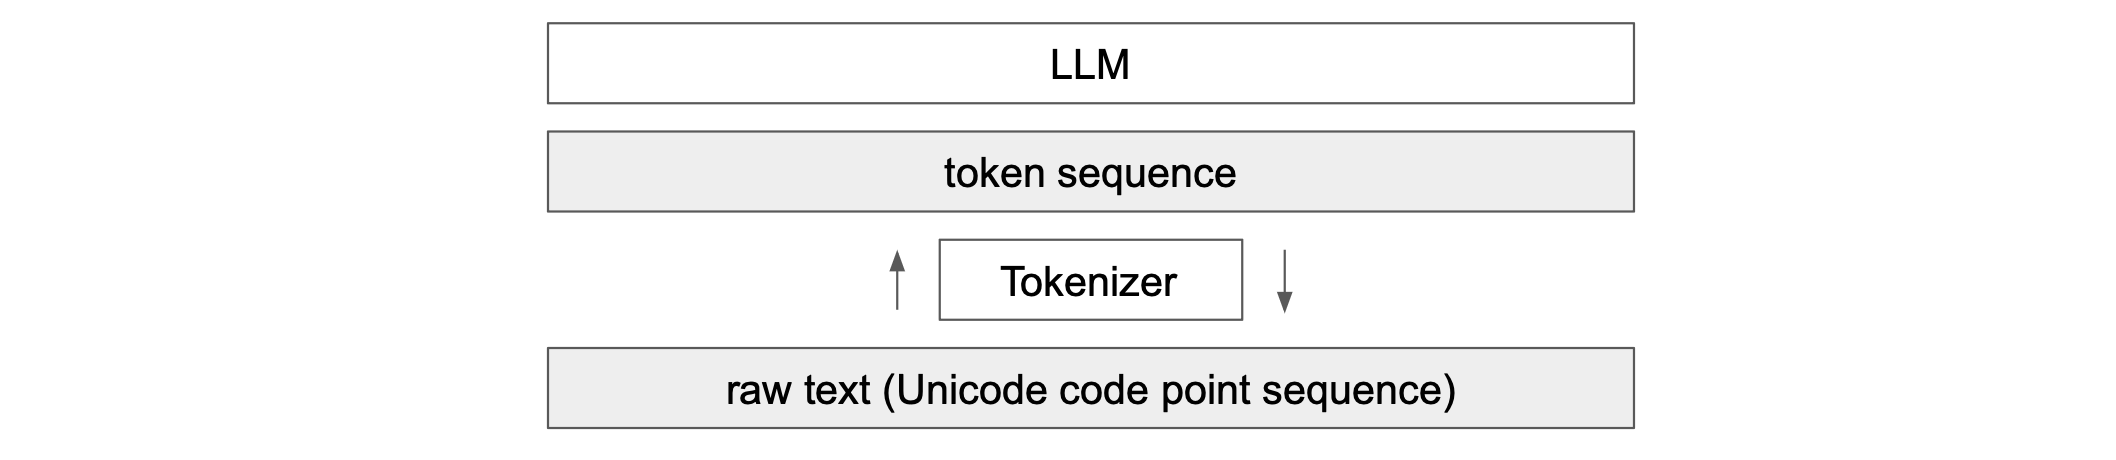

### decoding

Given a sequence of integers in the range [0, vocab_size], what is the text?


In [66]:
print(bytes([76]))
print(bytes([77]))
print(bytes([76]) + bytes([77]))

b'L'
b'M'
b'LM'


In [93]:
# create a vocab for each token(including merged token)

vocab = {idx: bytes([idx]) for idx in range(256)}
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1] # concatenating two bytes

In [72]:
print(vocab)

{0: b'\x00', 1: b'\x01', 2: b'\x02', 3: b'\x03', 4: b'\x04', 5: b'\x05', 6: b'\x06', 7: b'\x07', 8: b'\x08', 9: b'\t', 10: b'\n', 11: b'\x0b', 12: b'\x0c', 13: b'\r', 14: b'\x0e', 15: b'\x0f', 16: b'\x10', 17: b'\x11', 18: b'\x12', 19: b'\x13', 20: b'\x14', 21: b'\x15', 22: b'\x16', 23: b'\x17', 24: b'\x18', 25: b'\x19', 26: b'\x1a', 27: b'\x1b', 28: b'\x1c', 29: b'\x1d', 30: b'\x1e', 31: b'\x1f', 32: b' ', 33: b'!', 34: b'"', 35: b'#', 36: b'$', 37: b'%', 38: b'&', 39: b"'", 40: b'(', 41: b')', 42: b'*', 43: b'+', 44: b',', 45: b'-', 46: b'.', 47: b'/', 48: b'0', 49: b'1', 50: b'2', 51: b'3', 52: b'4', 53: b'5', 54: b'6', 55: b'7', 56: b'8', 57: b'9', 58: b':', 59: b';', 60: b'<', 61: b'=', 62: b'>', 63: b'?', 64: b'@', 65: b'A', 66: b'B', 67: b'C', 68: b'D', 69: b'E', 70: b'F', 71: b'G', 72: b'H', 73: b'I', 74: b'J', 75: b'K', 76: b'L', 77: b'M', 78: b'N', 79: b'O', 80: b'P', 81: b'Q', 82: b'R', 83: b'S', 84: b'T', 85: b'U', 86: b'V', 87: b'W', 88: b'X', 89: b'Y', 90: b'Z', 91: b'[',

In [94]:
# convert a list of tokens(ids) into a text

def decode(ids):
  # given ids (list of integers), return Python string
  tokens = b"".join(vocab[idx] for idx in ids)
  text = tokens.decode("utf-8", errors="replace")
  return text

### encoding

The other way around: Given a string, what are the tokens?


In [95]:
print(merges)

{(101, 32): 256, (105, 110): 257, (115, 32): 258, (116, 104): 259, (101, 114): 260, (99, 111): 261, (116, 32): 262, (226, 128): 263, (44, 32): 264, (97, 110): 265, (111, 114): 266, (100, 32): 267, (97, 114): 268, (101, 110): 269, (257, 103): 270, (261, 100): 271, (121, 32): 272, (46, 32): 273, (97, 108): 274, (259, 256): 275}


In [96]:
def encode(text):
  # given a string, return list of integers (the tokens)
  tokens = list(text.encode("utf-8"))
  while len(tokens) >= 2:
    stats = get_stats(tokens)
    pair = min(stats, key=lambda p: merges.get(p, float("inf")))
    if pair not in merges:
      break # nothing else can be merged
    idx = merges[pair]
    tokens = merge(tokens, pair, idx)
  return tokens



how the below code works with an example:

```
pair = min(stats, key=lambda p: merges.get(p, float("inf")))

stats = {
    (240, 159): 10,
    (104, 101): 5,
    (101, 108): 8,
    (108, 108): 12,
    (111, 32): 3,
    (32, 119): 7,
    (119, 111): 2,
    (111, 114): 9,
    (114, 108): 4,
}

merges = {
    (104, 101): 256,
    (108, 108): 257,
    (111, 32): 258,
    (114, 108): 259,
    (97,98):260
}


Pair Lookup Results:
merges.get((240, 159), float('inf')) returns inf
merges.get((104, 101), float('inf')) returns 256
merges.get((101, 108), float('inf')) returns inf
merges.get((108, 108), float('inf')) returns 257
merges.get((111, 32), float('inf')) returns 258
merges.get((32, 119), float('inf')) returns inf
merges.get((119, 111), float('inf')) returns inf
merges.get((111, 114), float('inf')) returns inf
merges.get((114, 108), float('inf')) returns 259


Selected Pair:
pair = (104, 101)
Merged Pair Value: 256


```



In [86]:
print(decode(encode("hello world")))

hello world


In [87]:
valtext = "Many common characters, including numerals, punctuation, and other symbols, are unified within the standard and are not treated as specific to any given writing system. Unicode encodes thousands of emoji, with the continued development thereof conducted by the Consortium as a part of the standard.[4] Moreover, the widespread adoption of Unicode was in large part responsible for the initial popularization of emoji outside of Japan. Unicode is ultimately capable of encoding more than 1.1 million characters."
valtext2 = decode(encode(valtext))
print(valtext2 == valtext)

True


### Forced splits using regex patterns (GPT series)


Byte Pair Encoding (BPE) (Sennrich et al., 2015) is a
practical middle ground between character and word level
language modeling which effectively interpolates between
**word level inputs for frequent symbol sequences and character level inputs for infrequent symbol sequences. Despite
its name, reference BPE implementations often operate on
Unicode code points and not byte sequences. These implementations would require including the full space of Unicode symbols in order to model all Unicode strings. This would result in a base vocabulary of over 130,000 before
any multi-symbol tokens are added**. This is prohibitively
large compared to the 32,000 to 64,000 token vocabularies
often used with BPE. In contrast, **a byte-level version of
BPE only requires a base vocabulary of size 256. However,
directly applying BPE to the byte sequence results in suboptimal merges due to BPE using a greedy frequency based
heuristic for building the token vocabulary**. We observed
BPE including many versions of common words like dog
since they occur in many variations such as dog. dog!
dog? . This results in a sub-optimal allocation of limited
vocabulary slots and model capacity. To avoid this, we prevent BPE from merging across character categories for any
byte sequence. We add an exception for spaces which significantly improves the compression efficiency while adding
only minimal fragmentation of words across multiple vocab
tokens.
This input representation allows us to combine the empirical
benefits of word-level LMs with the generality of byte-level
approaches. Since our approach can assign a probability to
any Unicode string, this allows us to evaluate our LMs on
any dataset regardless of pre-processing, tokenization, or
vocab size.


In [97]:
import regex as re
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "Hello've world123 how's are you!!!?"))

['Hello', "'ve", ' world', '123', ' how', "'s", ' are', ' you', '!!!?']


How does this work?

*   This regex pattern first splits the text into manageable chunks before applying the Byte Pair Encoding (BPE) algorithm. It ensures that meaningful linguistic components—such as words, numbers, and punctuation—are treated separately.

*   Once the text is segmented, BPE is applied to each chunk individually, breaking them down further into subword tokens. Unlike a basic tokenizer that merges frequent consecutive pairs across the entire input text, BPE refines each chunk separately before combining the results to form the final tokenized sequence. This approach enhances efficiency and ensures a more structured representation of the text.







In [98]:
import regex as re

class GPT4Tokenizer:
    def __init__(self):
        self.pattern = r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+"""
        self.vocab_size = 1024
        self.merges = {}
        self.vocab = {}

    # Find consecutive pairs
    def get_stats(self, token_ids, stats):
        for pair in zip(token_ids, token_ids[1:]):
            stats[pair] = stats.get(pair, 0) + 1
        return stats

    # Merge token ids
    def merge(self, token_ids, pair, new_index):
        _token_ids = []
        i = 0
        while i < len(token_ids):
            if (i < len(token_ids)-1) and (token_ids[i]==pair[0]) and (token_ids[i+1]==pair[1]):
                _token_ids.append(new_index)
                i += 2

            else:
                _token_ids.append(token_ids[i])
                i += 1
        return _token_ids

    def train(self, text, verbose=False):
        assert self.vocab_size >= 256
        num_merges = self.vocab_size - 256

        text_chunks = re.findall(self.pattern, text)
        token_ids = [list(chunk.encode('utf-8')) for chunk in text_chunks]

        self.vocab = {idx: bytes([idx]) for idx in range(256)}

        for i in range(num_merges):
            stats = {}
            for chunk_token in token_ids:
                self.get_stats(chunk_token, stats)
            top_pair = max(stats, key=stats.get)
            index = 256 + i
            if verbose:
                print(f"merged : {top_pair} -> {index}")

            token_ids = [self.merge(chunk_token, top_pair, index) for chunk_token in token_ids]

            self.vocab[index] = self.vocab[top_pair[0]] + self.vocab[top_pair[1]]
            self.merges[top_pair] = index


    # encode chunk
    def encode_chunks(self, chunk_bytes):
        chunk_token_ids = list(chunk_bytes)
        while len(chunk_token_ids) >=2:
            stats = {}
            self.get_stats(chunk_token_ids, stats)
            pair = min(stats, key= lambda x: self.merges.get(x, float("inf")))
            if pair not in self.merges:
                break
            index = self.merges[pair]
            chunk_token_ids = self.merge(chunk_token_ids, pair, index)
        return chunk_token_ids

    # encode full text
    def encode(self, text):
        text_chunks = re.findall(self.pattern, text)
        token_ids = []

        for chunk in text_chunks:
            chunk_bytes = chunk.encode("utf-8")
            chunk_tokens_ids = self.encode_chunks(chunk_bytes)
            token_ids.extend(chunk_tokens_ids)
        return token_ids

    # decoding
    def decode(self, token_ids):
        chunk_bytes = []
        for token in token_ids:
            if token in self.vocab:
                chunk_bytes.append(self.vocab[token])
            else:
                raise ValueError(f"Invalid token id: {token}")


        b_tokens_ids = b"".join(chunk_bytes)
        text = b_tokens_ids.decode('utf-8', errors= "replace")
        return text

In [99]:
model = GPT4Tokenizer()

In [102]:
# Let's download the tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

print("length of dataset in characters: ", len(text))

--2025-03-22 18:16:44--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt.1’

input.txt.1         100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2025-03-22 18:16:44 (16.7 MB/s) - ‘input.txt.1’ saved [1115394/1115394]

length of dataset in characters:  1115394


In [103]:
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens))

model.train(text, verbose=True)

merged : (32, 116) -> 256
merged : (104, 101) -> 257
merged : (32, 97) -> 258
merged : (111, 117) -> 259
merged : (32, 115) -> 260
merged : (32, 109) -> 261
merged : (105, 110) -> 262
merged : (32, 119) -> 263
merged : (114, 101) -> 264
merged : (104, 97) -> 265
merged : (58, 10) -> 266
merged : (110, 100) -> 267
merged : (256, 257) -> 268
merged : (32, 98) -> 269
merged : (105, 115) -> 270
merged : (111, 114) -> 271
merged : (10, 10) -> 272
merged : (32, 102) -> 273
merged : (101, 114) -> 274
merged : (108, 108) -> 275
merged : (105, 116) -> 276
merged : (111, 110) -> 277
merged : (44, 10) -> 278
merged : (32, 100) -> 279
merged : (32, 99) -> 280
merged : (101, 115) -> 281
merged : (101, 110) -> 282
merged : (32, 110) -> 283
merged : (32, 108) -> 284
merged : (32, 121) -> 285
merged : (46, 272) -> 286
merged : (256, 104) -> 287
merged : (97, 114) -> 288
merged : (32, 104) -> 289
merged : (32, 111) -> 290
merged : (256, 111) -> 291
merged : (285, 259) -> 292
merged : (32, 112) -> 293
m

In [104]:
text[:200]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you'

In [106]:
len(model.encode(text[:200]))

69

In [110]:
model.encode(' hear me speak')

[683, 321, 624]

In [111]:
model.vocab

{0: b'\x00',
 1: b'\x01',
 2: b'\x02',
 3: b'\x03',
 4: b'\x04',
 5: b'\x05',
 6: b'\x06',
 7: b'\x07',
 8: b'\x08',
 9: b'\t',
 10: b'\n',
 11: b'\x0b',
 12: b'\x0c',
 13: b'\r',
 14: b'\x0e',
 15: b'\x0f',
 16: b'\x10',
 17: b'\x11',
 18: b'\x12',
 19: b'\x13',
 20: b'\x14',
 21: b'\x15',
 22: b'\x16',
 23: b'\x17',
 24: b'\x18',
 25: b'\x19',
 26: b'\x1a',
 27: b'\x1b',
 28: b'\x1c',
 29: b'\x1d',
 30: b'\x1e',
 31: b'\x1f',
 32: b' ',
 33: b'!',
 34: b'"',
 35: b'#',
 36: b'$',
 37: b'%',
 38: b'&',
 39: b"'",
 40: b'(',
 41: b')',
 42: b'*',
 43: b'+',
 44: b',',
 45: b'-',
 46: b'.',
 47: b'/',
 48: b'0',
 49: b'1',
 50: b'2',
 51: b'3',
 52: b'4',
 53: b'5',
 54: b'6',
 55: b'7',
 56: b'8',
 57: b'9',
 58: b':',
 59: b';',
 60: b'<',
 61: b'=',
 62: b'>',
 63: b'?',
 64: b'@',
 65: b'A',
 66: b'B',
 67: b'C',
 68: b'D',
 69: b'E',
 70: b'F',
 71: b'G',
 72: b'H',
 73: b'I',
 74: b'J',
 75: b'K',
 76: b'L',
 77: b'M',
 78: b'N',
 79: b'O',
 80: b'P',
 81: b'Q',
 82: b'R',
 83: b'